# Tarea5

Claudio Pierard [@cpierard](https://github.com/cpierard)

**Envío del PR inicial:** lunes 17 de octubre

**Aceptación del PR:** lunes 31 de octubre

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [144]:
using Plots, LaTeXStrings

pyplot(grid=:false, size=(400,267))

Plots.PyPlotBackend()

In [24]:
Q_c(x,c) = x^2 + c
Q_c´(x) = 2*x

Q_c_2(x,c) = (x^2 + c)^2 + c

Q_c_2 (generic function with 1 method)

In [3]:
"""
    iterator(f::Function, n::Int, k::Int, x0, c)

La función `iterator` toma una función `f` y la itera `n` veces sin guardar ningún dato, y luego `k` veces guardando
los puntos de la órbita en una arreglo. Necesita una condición inicial `x0` y un parametro c, ya que la función debe
ser del tipo `f(x,c)`.

"""

function iterator(f::Function, n::Int, k::Int, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [4]:
"""
    lyapunov_exponent(Xi)

Toma un arreglo con n elementos de una órbita, con esos elemetos se calcula el exponente de Lyapunov de esa órbita.
"""

function lyapunov_exponent(Xi)
    
    σ = 0.0
    n = length(Xi)
    
    for i in 1:n
        
        σ += log(abs(Q_c´(Xi[i])))
        
    end
    
    λ = 1/n * σ
    
end

lyapunov_exponent (generic function with 1 method)

> Abajo probamos la función `lyapunov_exponent`, para la función `Q_c` declarada al principio del ejercicio, con $c = -1.5$.

In [5]:
orb_1 = iterator(Q_c, 100, 1000, 0.0, -1.5)

1000-element Array{Float64,1}:
 -0.248334 
 -1.43833  
  0.568794 
 -1.17647  
 -0.115911 
 -1.48656  
  0.709875 
 -0.996078 
 -0.507829 
 -1.24211  
  0.0428369
 -1.49817  
  0.744498 
  ⋮        
 -0.0567696
 -1.49678  
  0.740342 
 -0.951894 
 -0.593898 
 -1.14728  
 -0.183738 
 -1.46624  
  0.649861 
 -1.07768  
 -0.338604 
 -1.38535  

In [6]:
lyapunov_exponent(orb_1) # Caos

0.25999766464274

> El exponente de Lyapunov es positivo, eso implica que esta órbita es caótica.

> Se vuelve a hacer lo mismo para $c = 1.401$. Sabemos de la tarea anterior que para este parámetro, la órbita no es caótica.

In [7]:
orb_2 = iterator(Q_c, 100, 1000, 0.0, -1.2)
lyapunov_exponent(orb_2) #no caos

-0.11157177942474457

In [8]:
orb_3 = iterator(Q_c, 15000, 14500, 0.0, -1.401)
lia_3 = lyapunov_exponent(orb_3) # El exponente de Lyapunov es negativo => no hay caos.

-0.018692862862578284

> Ahora se quiere hacer lo mismo, pero para las órbitas que corresponde a los parámetro $c$ en el rango $[0.25, -2.0]$.

In [9]:
"""
    lyapunov_c_range(c_range)

Esta función toma un rango para los parámetros `c`, i calcula todo los exponentes de Lyapunov correspondientes a 
las órbitas de cada parámetro. Regresa un arreglo con todos los exponentes calculados.
"""

function lyapunov_c_range(c_range)
    
    lyapunov = Float64[]
    
    for i in c_range
        
        orb = iterator(Q_c, 100, 1000, 0.0, i)
        exponent = lyapunov_exponent(orb)
        push!(lyapunov, exponent)
        
    end
    
    lyapunov
    
end     

lyapunov_c_range (generic function with 1 method)

In [10]:
c_rango = 0.25:-0.001:-2.0
lyap_exponentes = lyapunov_c_range(c_rango);

> Graficamos los exponentes $\lambda(x)$ correspondientes a cada $c$, en el rango $[0.25, -2.0]$.


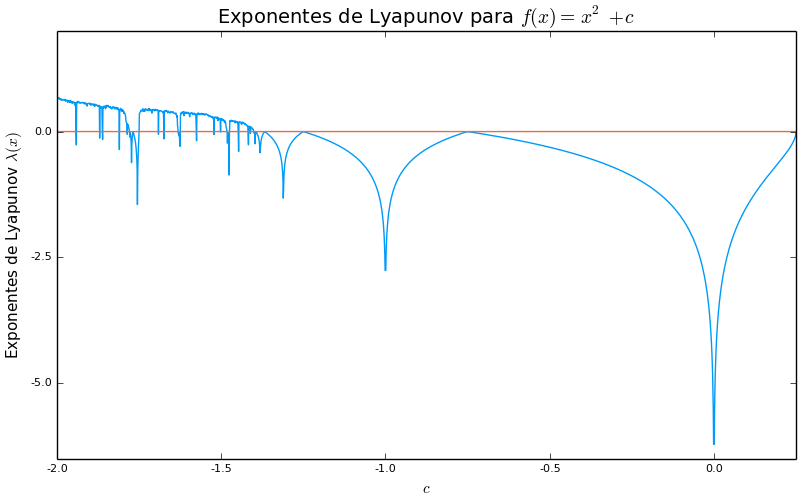

In [145]:
plot(c_rango, lyap_exponentes, ylim=(-6.5, 2), size=(800, 500), xlabel=(L"$c$"), 
    ylabel = (L"Exponentes de Lyapunov $\lambda(x)$"),
    title=(L"Exponentes de Lyapunov para $f(x) = \ x^2 + c$"))

plot!(c_rango, zeros(length(lyap_exponentes)))

**Respuesta**

> Observamos que para valores de c donde hay bifurcaciones se alcanza el valor 0. Esto se debe a que las derivadas se van acercando a cero justo antes de darse el punto de bifurcación, ahí se puede ver un 'pico', en esencia las dos derivadas correspondientes a la bifurcación.

> Sin embargo, en los ciclos superestables vemos que hay una tendencia hacia $-\infty$ en los valores de los exponentes -- esto lo podemos atribuir a que los sitios que rodean acaban siendo atraídos.

**Ejercicio 2:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.)

> En la tarea 4, pude notar que también se puede usar los puntos de superestabilidad para calcular las constante de Feigenbaum. Es mejor tomar estos, porque es más fácil detectarlos númericamente usando sus exponentes de Lyapunov, ya que los exponentes correspondientes a los puntos de bifurcación sólo se acercan a cero con valores del orden $10^-5$, mientras que para los puntos superestables, los exponentes son $-\infty$.

In [16]:
c_range = 0.25:-0.00001:-2.0
λ = lyapunov_c_range(c_range)

225001-element Array{Float64,1}:
 -0.00469562
 -0.00778096
 -0.00996958
 -0.0117704 
 -0.0133403 
 -0.014752  
 -0.0160465 
 -0.0172495 
 -0.0183783 
 -0.0194455 
 -0.0204604 
 -0.0214302 
 -0.0223604 
  ⋮         
  0.687652  
  0.689256  
  0.690213  
  0.688353  
  0.690988  
  0.688388  
  0.691031  
  0.692535  
  0.692661  
  0.688559  
  0.691647  
  1.38629   

In [22]:
function search_minus_inf(A, rango)
    
    B = Any[]
    
    for i in 2:length(A) - 1
        
        if A[i] < A[i-1] && A[i] < A[i+1]
            
            push!(B, rango[i])
            
        end
        
    end
    
    B
    
end         

search_minus_inf (generic function with 1 method)

In [23]:
λ_stability = search_minus_inf(λ, c_range)

17979-element Array{Any,1}:
  0.0    
 -1.0    
 -1.3107 
 -1.38155
 -1.39695
 -1.40025
 -1.40096
 -1.40111
 -1.40115
 -1.40119
 -1.40122
 -1.40125
 -1.40131
  ⋮      
 -1.99963
 -1.99967
 -1.9997 
 -1.99973
 -1.99976
 -1.99978
 -1.9998 
 -1.99984
 -1.99989
 -1.99992
 -1.99994
 -1.99998

In [75]:
function feigenbaum_const(A)
    ratio = Float64[]
    
    for i in 3:length(A)
        
        r = (A[i-1][1] - A[i-2][1])/(A[i][1] - A[i-1][1])
        push!(ratio, r)
        
    end
    
    ratio
    
end

feigenbaum_const (generic function with 1 method)

In [83]:
d_feigenbaum = feigenbaum_const(λ_stability[1:9])

7-element Array{Float64,1}:
 3.21854
 4.38532
 4.60065
 4.66667
 4.64789
 4.73333
 3.75   

In [80]:

a = Any[]
n = 0

for i in 2:length(1:9)
    
    puntos = iterator(itera_funcion_anonym(2^n), 10, 2, 0.0, λ_stability[i])
    push!(a, puntos)
    n += 1
    
end

a

8-element Array{Any,1}:
 [0.0,-1.0]                                      
 [4.580336590453982e-6,0.40723448994500444]      
 [7.988005323200653e-6,-0.16343264585949369]     
 [-2.73788545477327e-5,0.0653882356460942]       
 [-3.394046301297138e-5,-0.026090465261151552]   
 [4.042524059544306e-5,0.010400241227898732]     
 [-0.00015064408291953768,-0.0040328837400029904]
 [-0.0002460910006032435,0.0018706802220109786]  

In [81]:
#Calculamos esas proporciones

α_constant = Float64[]

for i in 1:length(a)-1
    
    α = abs(a[i][2] / a[i+1][2])
    push!(α_constant, α)
    
end

α_constant

7-element Array{Float64,1}:
 2.45559
 2.49176
 2.49942
 2.50621
 2.50864
 2.57886
 2.15584

In [35]:
"""
    itera_funcion_anonym(n)

Esta función declara una función anonima tipo `f(x,c) = x^2 + c`. Variando el parametro n (con n ∈ Naturales), la 
función declara una función anónima de la composición de la función f con sigo misma, un n número de veces. Ejemplo:

n = 3
f_out = ((x^2 + c)^2 + c)^2 + c

"""


function itera_funcion_anonym(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
end

itera_funcion_anonym (generic function with 1 method)

In [73]:
"""
    check_superstability(A, n, c_range)

Esta función verifica que los valores en un arreglo sean superestables para la función definida para este 
ejercicio.
"""

function check_superstability(A)
    
    B = Float64[]
    
    for i in 1:length(A)
        
        b = itera_funcion_anonym(2^9)(0.0, A[i])
        
        if abs(b) < 1e-4
            
            push!(B, A[i])
            
        end
    end
    
    #sort(B, rev=true)
    B
end

check_superstability (generic function with 2 methods)

**Ejercicio 3:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


**Ejercicio 4:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?


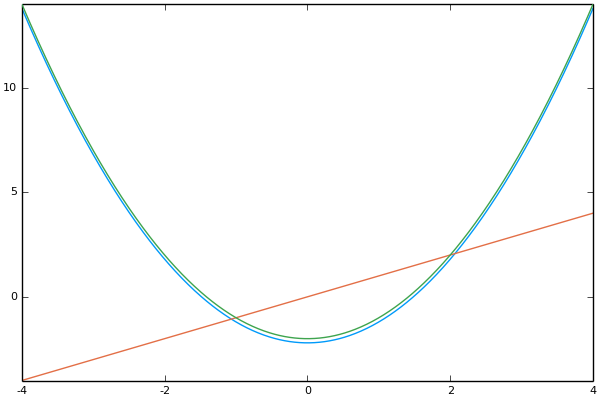

In [146]:
rango= -4:0.01:4
plot(rango, x -> x^2 -2.2, size=(600,400), label=(L"f(x) = x^2 -2.2"))
plot!(rango, identity, label=(L"f(x) = x"))
plot!(rango, x -> x^2 -2, label=(L"f(x) = x^2 -2"))

In [103]:
"""
    iteramapeo(f, x0, n)
    OUT: xx, fx

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal. Está función la definió Luis en clase.
"""

function iteramapeo(f, x0, n) #esto me lo robo de Luis.
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

"""
    cobweb_plot(f::Function, string_function::AbstractString, x0, rangex, n)

Función que hace el mapeo tipo cobweb o return map. f es la función que se quiere analizar, `string_function` es la 
función pero escrita en una cadena, `x0` es la condicón inicial, `rangex` es el rango del dominio donde se va a 
hacer el mapeo, y n es el número de iteraciones que se quiere hacer. 

"""

function cobweb_plot(f::Function, string_function::AbstractString, x0, rangex, n)

    xx, fx = iteramapeo(f, x0, n) #genera los puntos que se mapean.
    
    #Plotea la función por analizar.
    plot(rangex, f, xaxis=(L"x", (rangex[1], rangex[end])), yaxis=L"f(x)", label=(latexstring(string("f(x)=", 
            string_function))), size=(700, 450), title=(latexstring(string("f(x)=", string_function)))) 
    
    #hace la grafica de la función identidad.
    plot!(rangex, identity, label=(L"f(x) = x") )
    
    #hace la grafica del "camino" de las iteraciones.
    plot!(xx, fx, marker=(:dot, 3, 0.4), label=(latexstring(string("x_0=", x0))))

end

"""
    cobweb_plot!(f::Function, x0, n)

Función que agrega un `plot!` a `cobweb_plot`. No funciona sin haber hecho primero un `cobweb_plot` con los mismos
parámetros de que `cobweb_plot!`. E este caso ya no es necesario poner un rango, ni el string de la función, sólo la
función `f`, la condición inicial `x0` y `n` el número de iteraciones que van a hacer.
 
"""

function cobweb_plot!(f::Function, x0, n)

    xx, fx = iteramapeo(f, x0, n) #genera los puntos que se mapean.
    
    #agrega un mapeo a una función cobweb_plot.
    plot!(xx, fx, marker=(:dot, 3, 0.4), label=(label=(latexstring(string("x_0=", x0))))) 

end

cobweb_plot! (generic function with 1 method)


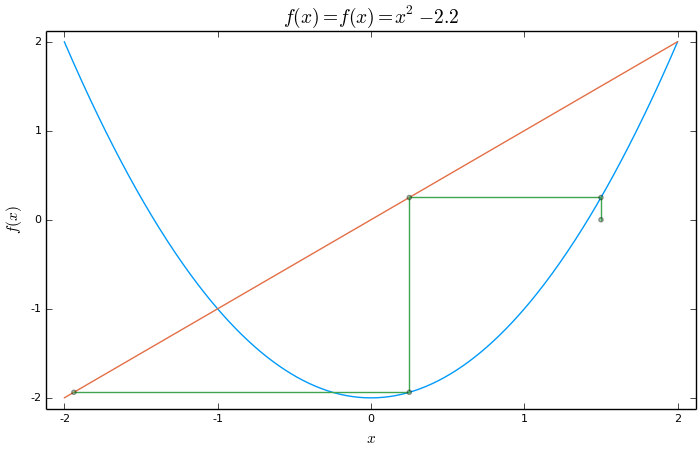

In [137]:
cobweb_plot(x -> x^2 -2, "f(x) = x^2 - 2.2", 1.5, -2:0.01:2, 2)

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)